This example creates a striatal network of 100 dSPN and 100 iSPN neurons. You can also do this using the command line interface, see "snudda -h".

This notebook is started in the Snudda/snudda/examples/notebooks directory, as all paths are given relative to there.

First we create a network-config.json file in networks/simple_example which is a subdirectory to the notebooks directory. The 200 neurons are placed inside a cube, with cell density 80500 neurons/mm3. The neuron morphologies and parameters are taken from the data/cellspecs/dspn and ispn folders.

In [1]:
import os
from snudda.init import SnuddaInit

network_path = os.path.join("networks","simple_example")
config_file = os.path.join(network_path, "network-config.json")
cnc = SnuddaInit(struct_def={}, config_file=config_file, num_population_units=1)
cnc.define_striatum(num_dSPN=100, num_iSPN=100, num_FS=0, num_LTS=0, num_ChIN=0,
                    volume_type="cube", cell_spec_dir="../../snudda/data/neurons")
cnc.write_json(config_file)


CreateConfig
Seeding with rand_seed=None
Random seed init to 3032539684
Random seed place to 1125394389
Random seed detect to 1331193809
Random seed prune to 2561286080
Random seed input to 2046828052
Random seed simulate to 3935594901
Overriding the number of population units
Using 1 Population Units
No structDef defined, not writing JSON file in init
Using cube for striatum
Creating cube mesh
File: networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00013543930142996346
Description: Striatum cube mesh, centre: [0.00354  0.004645 0.005081], side: 0.00013543930142996346
Adding neurons: dSPN from dir ../../snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir ../../snudda/data/neurons/striatum/ispn
Writing networks/simple_example/network-config.json


This reads in the network-config.json file and places the dSPN and iSPN neurons within the cube volume, then writes the positions to the network-neuron-positions.hdf5 file.

In [2]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.read_config()
sp.write_data()

Using hdf5 version: latest
Parsing configuration file networks/simple_example/network-config.json
Reading random see from config file: 1125394389
Using mesh_bin_width 0.00013543930142996346
Cube mesh, switching to serial processing.
Found old cache file (networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj-135-cache.pickle), ignoring.
Running in serial
Voxel mask: 5x5x5
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Fraction of border voxels: 0.0
Saving mesh cache file networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj-135-cache.pickle
Calculation time: 0.017193737003253773 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 25 dSPN_0
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Placed 25 in 0.03816

In [3]:
from snudda.detect import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

Using hdf5 driver version: latest
Memory: 56694648832 free, 67218092032 total
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Removing old files networks/simple_example/network-putative-synapses-MERGED.hdf5
Removing old files networks/simple_example/network-pruned-synapses.hdf5
Removing old files networks/simple_example/network-pruned-synapses.hdf5-cache
Loading from networks/simple_example/network-config.json
Reading random seed from config file: 1331193809
Reading prototype for: dSPN_0
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Reading prototype for: dSPN_1
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Reading prototype for: dSPN_2
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521/WT-1215MSN03-cor-rep-ax2-cache.pickle
Reading pro

Create lookup table
detectSynapses: 4 took 0.004516710992902517 s
Create lookup table
detectGapJunctions: 0.002571679011452943 s
Wrote hyper voxel 0 (4 synapses, 0 gap junctions)
HyperID 0 completed - 4  synapses and 0 gap junctions found (in 5.907119087991305 s)
Processing hyper voxel : 36/64(32 neurons)
Create lookup table
detectSynapses: 0 took 0.004313340003136545 s
Create lookup table
detectGapJunctions: 0.002425966988084838 s
Wrote hyper voxel 36 (0 synapses, 0 gap junctions)
HyperID 36 completed - 0  synapses and 0 gap junctions found (in 4.712607043999014 s)
Processing hyper voxel : 26/64(24 neurons)
Create lookup table
detectSynapses: 0 took 0.00424584501888603 s
Create lookup table
detectGapJunctions: 0.002586943010101095 s
Wrote hyper voxel 26 (0 synapses, 0 gap junctions)
HyperID 26 completed - 0  synapses and 0 gap junctions found (in 3.652102194027975 s)
Processing hyper voxel : 24/64(24 neurons)
Create lookup table
detectSynapses: 0 took 0.004355565004516393 s
Create loo

Prune the synapses in the network based on the connection information in the network-config.json file.

In [4]:
from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Log file networks/simple_example/log/logFile-synapse-pruning.txt created.
Random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/simple_example/log/network-detect-worklog.hdf5
Reading random seed from config file: 2561286080
Using default scratch path: networks/simple_example/temp
Skipping FSN to FSN connection
Skipping FSN to dSPN connection
Skipping FSN to iSPN connection
Skipping FSN to LTS connection
Skipping dSPN to ChIN connection
Skipping iSPN to ChIN connection
Skipping LTS to dSPN connection
Skipping LTS to iSPN connection
Skipping LTS to ChIN connection
Checking for merge file networks/simple_example/network-putative-synapses-MERGED.hdf5
Running merge in serial
Doing big_merge_loopup for synapses
[0, 521, 1048576, 0.75]
(0, 521, 20971520, 0.75)
Opening voxel file: networks/simple_example/voxels/network-putative-synapses-21.hdf5
[0, 521, 20971520, 0.75]
Setting max_channel_type to 23 from h_id=21
Opening voxel file: networks/simple_example

Random seed set for neuron 61: 879667309
Random seed set for neuron 62: 3525726113
Random seed set for neuron 63: 3069454749
Random seed set for neuron 64: 623667897
Random seed set for neuron 65: 1998637635
Random seed set for neuron 66: 2699617903
Random seed set for neuron 67: 2696652786
Random seed set for neuron 68: 957598246
Random seed set for neuron 69: 4164350709
Random seed set for neuron 70: 1024059598
Random seed set for neuron 71: 2618412984
Random seed set for neuron 72: 432939035
Random seed set for neuron 73: 944454760
Random seed set for neuron 74: 4178552264
Random seed set for neuron 75: 773442576
Random seed set for neuron 76: 379869137
Random seed set for neuron 77: 2024386858
Random seed set for neuron 78: 420780307
Random seed set for neuron 79: 4232308266
Random seed set for neuron 80: 1613288253
Random seed set for neuron 81: 3349208387
Random seed set for neuron 82: 1291636219
Random seed set for neuron 83: 667828871
Random seed set for neuron 84: 383148387
Ra

Use matplotlib to plot the network. Note that this can be quite slow for larger networks.

Loading networks/simple_example/network-pruned-synapses.hdf5
Loading config data from HDF5
200 neurons with 24015 synapses and 0 gap junctions
Load done. 0.023533931002020836
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/ispn/str-ispn-e151123_c1_D2-mWT-P270-09-v20190527/WT-P270-09-15ak-cor-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/ispn/str-ispn-e160118_c10_D2-m46-3-DE-v20190529/46-3-DE-cor-rep-ax-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/ispn/str-ispn-e150908_c4_D2-m51-5-DE-v20190611/51-5-DE-cor-rep-ax-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521/WT-1215MSN03-cor-rep-ax2-cache.pickle
Fo

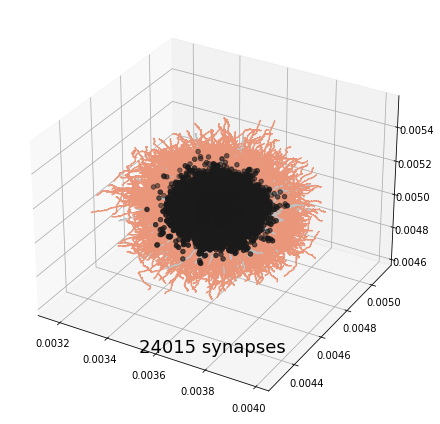

In [5]:
from snudda.plotting.plot_network import PlotNetwork
network_file = os.path.join(network_path, "network-pruned-synapses.hdf5")
pn = PlotNetwork(network_file)
pn.plot()
pn.close()  # Close the hdf5 file so others can use it